In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/train.csv')

In [3]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
df.shape

(1142, 785)

In [5]:
df.sample()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
89,6,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


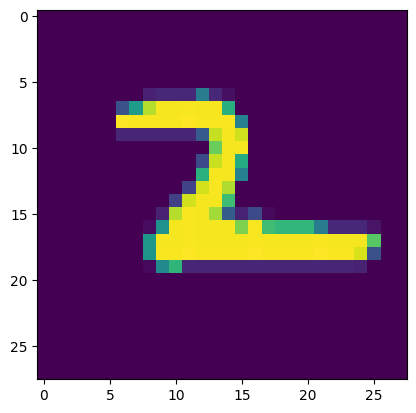

In [6]:
#to see that image
plt.imshow(df.iloc[44,1:].values.reshape(28,28))

In [7]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [8]:
X = X.dropna()
y = y[X.index]

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [10]:
X_train.shape

(912, 784)

In [11]:
y_train.shape

(912,)

In [12]:
from sklearn.neighbors import KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()

In [14]:
from sklearn.metrics import accuracy_score
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)

In [15]:
accuracy_score(y_test,y_pred)

0.8558951965065502

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

In [19]:
X_test.shape

(229, 784)

In [20]:
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [21]:
X_test_trf.shape

(229, 10)

In [22]:
knn = KNeighborsClassifier()
knn.fit(X_train_trf,y_train)
y_pred = knn.predict(X_test_trf)

In [23]:
print("Length of y_test:", len(y_test))
print("Length of y_pred:", len(y_pred))

Length of y_test: 229
Length of y_pred: 229


In [24]:
accuracy_score(y_test,y_pred)

0.8078602620087336

In [27]:
for i in range(1,784):
  pca = PCA(n_components=i)
  X_train_trf = pca.fit_transform(X_train)
  X_test_trf = pca.transform(X_test)
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train_trf,y_train)
  y_pred = knn.predict(X_test_trf)
  print(accuracy_score(y_test,y_pred))
  print(i)

0.21397379912663755
1
0.27510917030567683
2
0.4497816593886463
3
0.6200873362445415
4
0.6899563318777293
5
0.74235807860262
6
0.7641921397379913
7
0.7685589519650655
8
0.7685589519650655
9
0.8034934497816594
10
0.8122270742358079
11
0.8034934497816594
12
0.7903930131004366
13
0.8034934497816594
14
0.8253275109170306
15
0.8209606986899564
16
0.8253275109170306
17
0.8253275109170306
18
0.8209606986899564
19
0.8122270742358079
20
0.8209606986899564
21
0.8209606986899564
22
0.8165938864628821
23
0.8209606986899564
24
0.8122270742358079
25
0.8078602620087336
26
0.8165938864628821
27
0.7903930131004366
28
0.7947598253275109
29
0.7947598253275109
30
0.7903930131004366
31
0.7991266375545851
32
0.7903930131004366
33
0.7729257641921398
34
0.7860262008733624
35
0.7816593886462883
36
0.7816593886462883
37
0.7816593886462883
38
0.7816593886462883
39
0.759825327510917
40
0.759825327510917
41
0.7510917030567685
42
0.74235807860262
43
0.7467248908296943
44
0.7510917030567685
45
0.7292576419213974
46
0

In [28]:
#3d
pca = PCA(n_components=3)
X_train_trf = pca.fit_transform(X_train)
X_test_trf = pca.transform(X_test)

In [29]:
import plotly.express as px
y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,x=X_train_trf[:,0],y=X_train_trf[:,1],z=X_train_trf[:,2],color=y_train_trf)
fig.update_layout(margin=dict(l=20,r=20,b=20,t=20),paper_bgcolor='LightSteelBlue',)
fig.show()

In [34]:
pca.explained_variance_
#Eigen Values

array([41.09743743, 29.98160148, 28.85981313])

In [31]:
pca.components_.shape
#eigen vectors

(3, 784)

In [32]:
pca.explained_variance_ratio_

array([0.06729897, 0.04909627, 0.04725929])

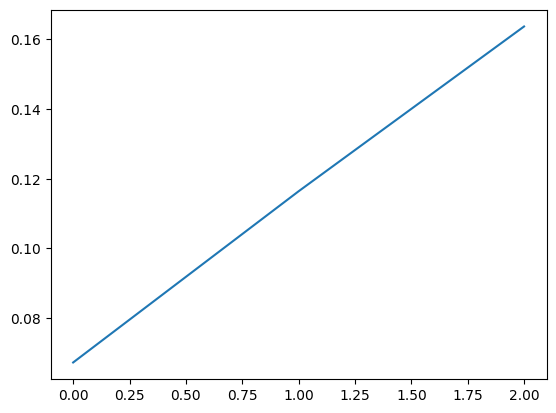

In [33]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))